## Different methods to change the main color of an image

Die Hauptfarbe des Bildes ist: [171, 156, 132]


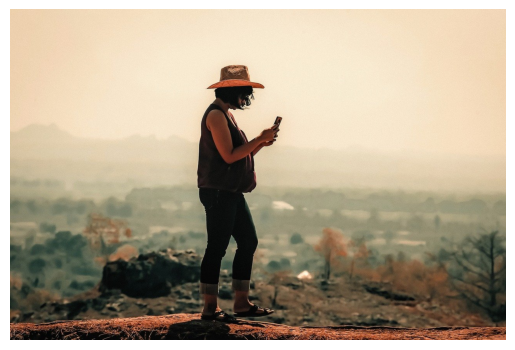

Die Hauptfarbe des Bildes ist: [171, 156, 132]


In [1]:
from PIL import Image
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

# Method to get the main color
def get_main_color(image_path):
     # Bild öffnen
    image = io.imread(image_path)

    # Bild in ein NumPy-Array konvertieren
    image_array = np.array(image)

    # Die Form des Arrays ändern, um die Pixel als Flachliste zu erhalten
    flattened_image_array = image_array.reshape((-1, 3))

    # Die Hauptfarbe finden, indem der Durchschnitt der RGB-Werte berechnet wird
    main_color = np.mean(flattened_image_array, axis=0)
    
    # Konvertiere die Hauptfarbe in eine Liste von Ganzzahlen
    main_color_list = main_color.astype(int).tolist()

    print(f'Die Hauptfarbe des Bildes ist: {main_color_list}')

    return main_color_list

# Beispielaufruf
image_path = 'pictures/woman.jpg'
main_color = get_main_color(image_path)

# Anzeigen des Bildes
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

print(f'Die Hauptfarbe des Bildes ist: {main_color}')

In [2]:
from PIL import Image
import numpy as np
import webcolors


def get_color_name(rgb_values):
    try:
        # Übersetze die RGB-Werte in einen Farbnamen
        color_name = webcolors.rgb_to_name(tuple(rgb_values))
    except ValueError:
        # Wenn kein genauer Farbname gefunden wird, gib "Unbekannt" zurück
        color_name = "Unbekannt"

    return color_name

# Beispielaufruf
color_name = get_color_name(main_color)

print(f'Die Hauptfarbe des Bildes ist: {color_name}')

ModuleNotFoundError: No module named 'webcolors'

In [ ]:
from PIL import Image
import numpy as np
from collections import Counter
import webcolors

def get_most_common_color(image_path):
    # Bild öffnen
    image = Image.open(image_path)

    # Bild in ein NumPy-Array konvertieren
    image_array = np.array(image)

    # Die Form des Arrays ändern, um die Pixel als Flachliste zu erhalten
    flattened_image_array = image_array.reshape((-1, 3))

    # Zähle die Häufigkeit jeder Farbe
    color_counts = Counter(map(tuple, flattened_image_array))

    # Finde die am häufigsten vorkommende Farbe
    most_common_color = color_counts.most_common(1)[0][0]

    # Konvertiere die am häufigsten vorkommende Farbe in eine Liste von Ganzzahlen
    most_common_color_list = np.array(most_common_color).astype(int).tolist()

    return most_common_color_list

def get_color_name(rgb_values):
    try:
        # Übersetze die RGB-Werte in einen Farbnamen
        color_name = webcolors.rgb_to_name(tuple(rgb_values))
    except ValueError:
        # Wenn kein genauer Farbname gefunden wird, gib "Unbekannt" zurück
        color_name = "Unbekannt"

    return color_name

# Beispielaufruf
image_path = 'pictures/woman.jpg'
most_common_color = get_most_common_color(image_path)
color_name = get_color_name([255,0,0])

print(f'Die Hauptfarbe des Bildes ist: {most_common_color}')
print(f'Die am häufigsten vorkommende Farbe des Bildes ist: {color_name}')

newColor = '#FF0000'
rgb_color = tuple(int(newColor[i:i+2], 16) for i in (2, 4, 6))
print(rgb_color)

Die Hauptfarbe des Bildes ist: [249, 235, 209]
Die am häufigsten vorkommende Farbe des Bildes ist: red
(240, 0, 0)


### Applying the color to the contours

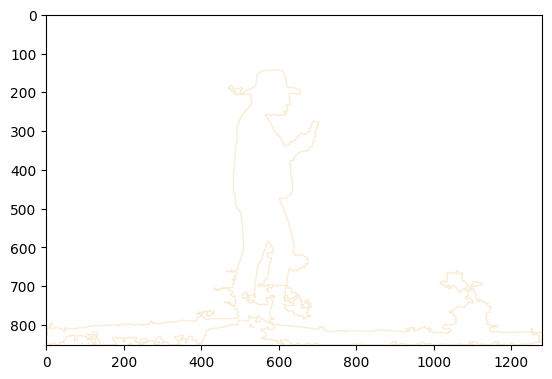

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_path = 'pictures/woman.jpg'
image = cv2.imread(image_path)

main_color = get_most_common_color(image_path)


CANNY_THRESH_1 = 1
CANNY_THRESH_2 = 500
MASK_COLOR = (1.0,1.0,1.0) # In BGR format

size = (6, 6)
kernel1 = np.ones((4, 4), np.uint8)
kernel2 = np.ones((3, 3), np.uint8)

# Color Space Conversion Codes
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# -- Edge detection -------------------------------------------------------------------
# Edge Detection Algorithm
edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)

# Enlarges the area of the object, highlighting features
edges = cv2.dilate(edges, kernel1)

# Erode the boundaries of the foreground object
edges = cv2.erode(edges, kernel2)

# Assignment of pixel values in relation to the provided threshold
_, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a white background image
white_background = np.ones_like(image) * 255

drawing = np.copy(white_background)
CountersImg = cv2.drawContours(drawing, contours, -1,  main_color, 2)

plt.imshow(CountersImg)
plt.show()